# Importações

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
import seaborn as sns
import matplotlib.dates as mdates
from dateutil import parser


# Conexão ao PostgreSQl

In [2]:
bucket = 'Seasonality'
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432


# URL de conexão com PostgreSQL
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

#Nome da tabela 
meteorology ='meteorology'

# Importar dados do PostgreSQl

In [3]:
try:
    # Ler os dados da tabela no DataFrame
    df = pd.read_sql(f"SELECT * FROM {meteorology}", con=engine)
    
    # Exibir as duas primeiras colunas
    print(df.head())  
except Exception as e:
    print(f"Erro ao importar os dados: {e}")

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2021-08-01 00:00:00  17.6       17.6  11.7     68.28     0.0         0.0   
1 2021-08-01 01:00:00  17.5       17.5  12.6     72.76     0.0         0.0   
2 2021-08-01 02:00:00  17.1       17.1  12.7     75.04     0.0         0.0   
3 2021-08-01 03:00:00  17.1       17.1  12.7     74.99     0.0         0.0   
4 2021-08-01 04:00:00  17.0       17.0  12.4     74.15     0.0         0.0   

  preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0       None       NaN       24.9    339.0            1020.7         NaN   
1       None       NaN       18.0    340.0            1020.7         0.0   
2       None       NaN       17.9    330.0            1020.0         NaN   
3       None       NaN       11.0    330.0            1019.9        30.0   
4       None       NaN        7.6    350.0            1019.5        10.0   

   visibility        conditions                             stations  
0  

In [4]:
df

,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,stations
0,2021-08-01 00:00:00,17.6,17.6,11.7,68.28,0.0,0.0,None,NaN,24.9,339.0,1020.7,NaN,10.0,Clear,"08535099999,08534099999,08579099999"
1,2021-08-01 01:00:00,17.5,17.5,12.6,72.76,0.0,0.0,None,NaN,18.0,340.0,1020.7,0.0,20.0,Clear,"08535099999,08534099999,08579099999"
2,2021-08-01 02:00:00,17.1,17.1,12.7,75.04,0.0,0.0,None,NaN,17.9,330.0,1020.0,NaN,10.0,Clear,"08535099999,08534099999,08579099999"
3,2021-08-01 03:00:00,17.1,17.1,12.7,74.99,0.0,0.0,None,NaN,11.0,330.0,1019.9,30.0,10.0,Partially cloudy,"08535099999,08534099999,08579099999"
4,2021-08-01 04:00:00,17.0,17.0,12.4,74.15,0.0,0.0,None,NaN,7.6,350.0,1019.5,10.0,20.0,Clear,"08535099999,08534099999,08579099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29968,2024-11-01 19:00:00,17.0,17.0,15.9,92.90,0.0,0.0,None,NaN,11.2,138.0,1016.8,56.3,10.0,Partially cloudy,"08534099999,08536099999,LPPT"
29969,2024-11-01 20:00:00,16.0,16.0,15.9,99.00,0.0,0.0,None,NaN,7.6,135.0,1017.0,37.3,10.0,Partially cloudy,"08534099999,08536099999,LPPT"
29970,2024-11-01 21:00:00,15.9,15.9,15.9,99.50,0.0,0.0,None,NaN,7.5,90.0,1017.9,37.3,11.6,Partially cloudy,"08534099999,08536099999,LPPT"
29971,2024-11-01 22:00:00,16.0,16.0,16.0,100.00,NaN,0.0,None,NaN,7.6,70.0,1018.0,50.0,10.0,Partially cloudy,"08536099999,LPPT"


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Selecionar só as colunas temp e precip e fazer o resample diário com média
df = df[['temp', 'precip']].resample('D').mean()


In [6]:
df

,temp,precip
datetime,,
2021-08-01,20.850000,0.0
2021-08-02,21.420833,0.0
2021-08-03,21.858333,0.0
2021-08-04,22.741667,0.0
2021-08-05,22.620833,0.0
...,...,...
2024-12-27,10.662500,0.0
2024-12-28,10.608333,0.0
2024-12-29,9.504167,0.0


In [7]:
df_corrigido_final = pd.read_csv('df_corrigido_final.csv')
df_corrigido_final

,detected,direction_2,count_2,direction_3,count_3,direction_4,count_4,direction_5,count_5,direction_6,...,count_32,direction_33,count_33,direction_34,count_34,direction_35,count_35,holiday,weekend,exog
0,2021-08-01,219,327,155,323,138,424,238,341,539,...,500,401,769,354,691,526,1149,0,1,1
1,2021-08-02,144,252,194,381,117,372,249,364,735,...,486,355,590,436,777,523,1163,0,0,0
2,2021-08-03,151,257,187,397,137,411,321,431,732,...,568,441,699,376,724,584,1194,0,0,0
3,2021-08-04,141,266,157,337,158,423,306,404,706,...,563,379,626,430,799,616,1236,0,0,0
4,2021-08-05,159,259,182,333,121,370,257,370,740,...,584,367,602,424,846,636,1245,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2024-02-25,298,583,45,146,113,188,123,339,192,...,239,187,583,273,776,198,548,0,1,1
939,2024-02-26,226,494,290,606,193,316,281,732,357,...,206,155,374,381,1214,221,608,0,0,0
940,2024-02-27,235,539,347,743,240,377,428,1053,433,...,285,344,770,468,1368,271,780,0,0,0
941,2024-02-28,249,573,254,572,261,437,379,972,456,...,317,352,829,460,1399,267,744,0,0,0


In [8]:
def gini_geometrico(valores):
    x = np.sort(np.array(valores))
    n = len(x)
    if n == 0 or np.sum(x) == 0:
        return np.nan
    y_acumulado = np.cumsum(x) / np.sum(x)
    x_lin = np.arange(1, n + 1) / n
    return (2 / n) * np.sum(x_lin - y_acumulado)

In [9]:
def gini_semanal(df, coluna='count_8', plotar=True, cor ='blue' ):
    # Extrair ano e semana ISO
    df['ano'] = df['datetime'].dt.isocalendar().year
    df['semana'] = df['datetime'].dt.isocalendar().week
    # Contar número de dias por semana
    dias_validos = df.groupby(['ano', 'semana']).size().reset_index(name='n_dias')
    # Ficar apenas com semanas com exatamente 7 dias
    semanas_completas = dias_validos[dias_validos['n_dias'] == 7][['ano', 'semana']]
    # Filtrar o DataFrame original
    df = df.merge(semanas_completas, on=['ano', 'semana'])

    # Calcular o índice de Gini geométrico por grupo (ano + semana)
    df_gini = (
        df.groupby(['ano', 'semana'])[coluna]
          .apply(gini_geometrico)
          .reset_index(name='gini')
    )

    # Criar uma coluna de datas para o início da semana
    df_gini['semana_data'] = pd.to_datetime(
        df_gini['ano'].astype(str) + '-W' + df_gini['semana'].astype(str) + '-1',
        format='%G-W%V-%u',
        errors='coerce'
    )

    if plotar:
        plt.figure(figsize=(14,5))
        plt.plot(df_gini['semana_data'], df_gini['gini'], marker='o', color=cor)
        plt.title('Índice de Gini semanal (com base em 7 dias por semana)')
        plt.xlabel('Data (início da semana)')
        plt.ylabel('Gini')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return df_gini

In [10]:
df_corrigido_final

,detected,direction_2,count_2,direction_3,count_3,direction_4,count_4,direction_5,count_5,direction_6,...,count_32,direction_33,count_33,direction_34,count_34,direction_35,count_35,holiday,weekend,exog
0,2021-08-01,219,327,155,323,138,424,238,341,539,...,500,401,769,354,691,526,1149,0,1,1
1,2021-08-02,144,252,194,381,117,372,249,364,735,...,486,355,590,436,777,523,1163,0,0,0
2,2021-08-03,151,257,187,397,137,411,321,431,732,...,568,441,699,376,724,584,1194,0,0,0
3,2021-08-04,141,266,157,337,158,423,306,404,706,...,563,379,626,430,799,616,1236,0,0,0
4,2021-08-05,159,259,182,333,121,370,257,370,740,...,584,367,602,424,846,636,1245,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2024-02-25,298,583,45,146,113,188,123,339,192,...,239,187,583,273,776,198,548,0,1,1
939,2024-02-26,226,494,290,606,193,316,281,732,357,...,206,155,374,381,1214,221,608,0,0,0
940,2024-02-27,235,539,347,743,240,377,428,1053,433,...,285,344,770,468,1368,271,780,0,0,0
941,2024-02-28,249,573,254,572,261,437,379,972,456,...,317,352,829,460,1399,267,744,0,0,0


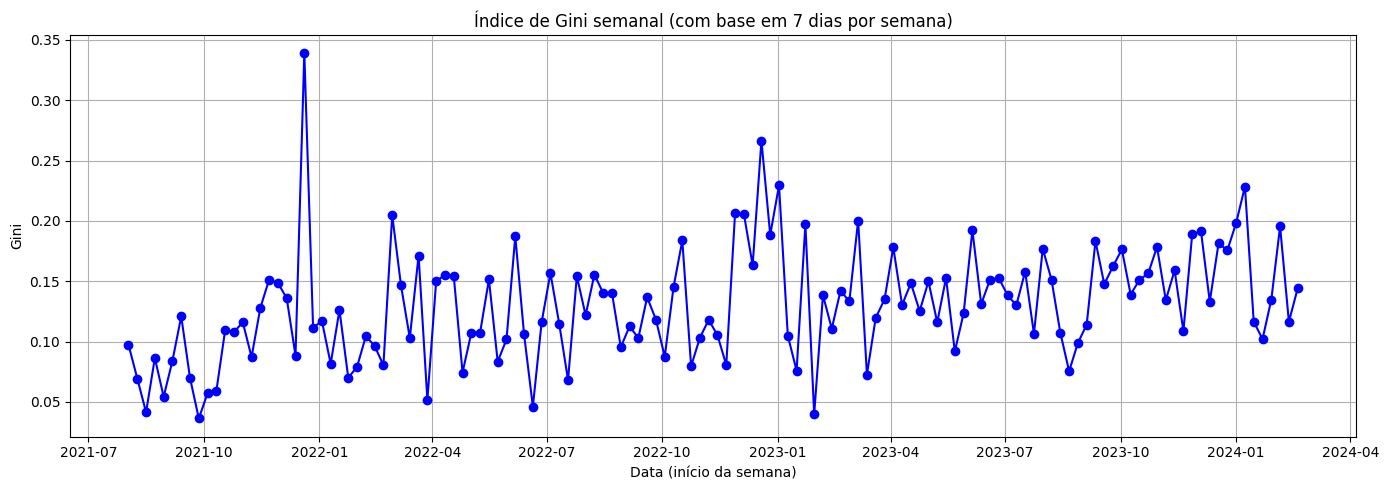

In [13]:
df_corrigido_final = df_corrigido_final[['detected', 'count_8']].copy()
df_corrigido_final.columns = ['datetime', 'count_8']
df_corrigido_final['datetime'] = pd.to_datetime(df_corrigido_final['datetime'])


# 3. Agora aplica a função normalmente
df_gini = gini_semanal(df_corrigido_final, coluna='count_8', plotar=True)



In [15]:
df.index = pd.to_datetime(df.index)


In [16]:
df_meteo_semanal = df.resample('W').mean().reset_index()
df_meteo_semanal.columns = ['semana_data', 'temp', 'precip']  # para casar com df_gini


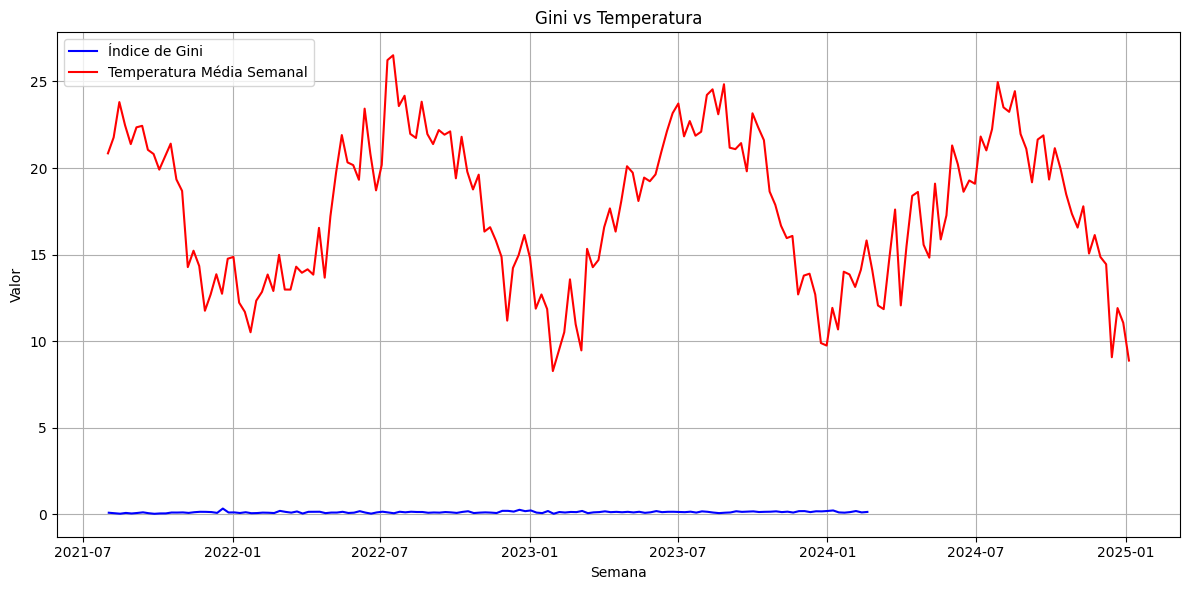

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_gini['semana_data'], df_gini['gini'], label='Índice de Gini', color='blue')
plt.plot(df_meteo_semanal['semana_data'], df_meteo_semanal['temp'], label='Temperatura Média Semanal', color='red')
plt.xlabel('Semana')
plt.ylabel('Valor')
plt.title('Gini vs Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


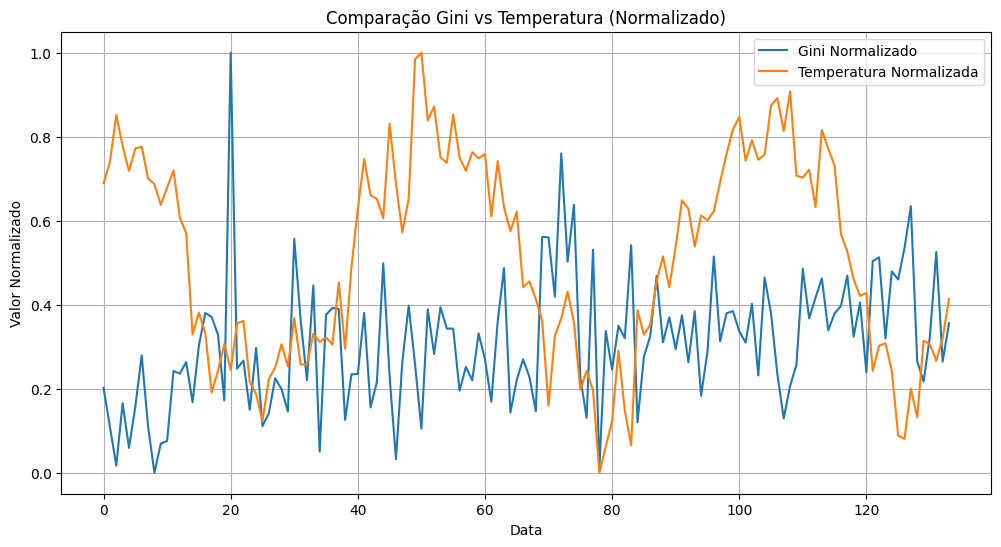

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Supondo df_gini e df_meteo já com índices datetime

# Primeiro, alinhamos os índices (datas) comuns para comparação
common_dates = df_gini.index.intersection(df_meteo_semanal.index)

gini_aligned = df_gini.loc[common_dates]['gini'].values.reshape(-1,1)
temp_aligned = df_meteo_semanal.loc[common_dates]['temp'].values.reshape(-1,1)

# Normalização
scaler = MinMaxScaler()
gini_scaled = scaler.fit_transform(gini_aligned).flatten()
temp_scaled = scaler.fit_transform(temp_aligned).flatten()

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(common_dates, gini_scaled, label='Gini Normalizado')
plt.plot(common_dates, temp_scaled, label='Temperatura Normalizada')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.title('Comparação Gini vs Temperatura (Normalizado)')
plt.legend()
plt.grid(True)
plt.show()



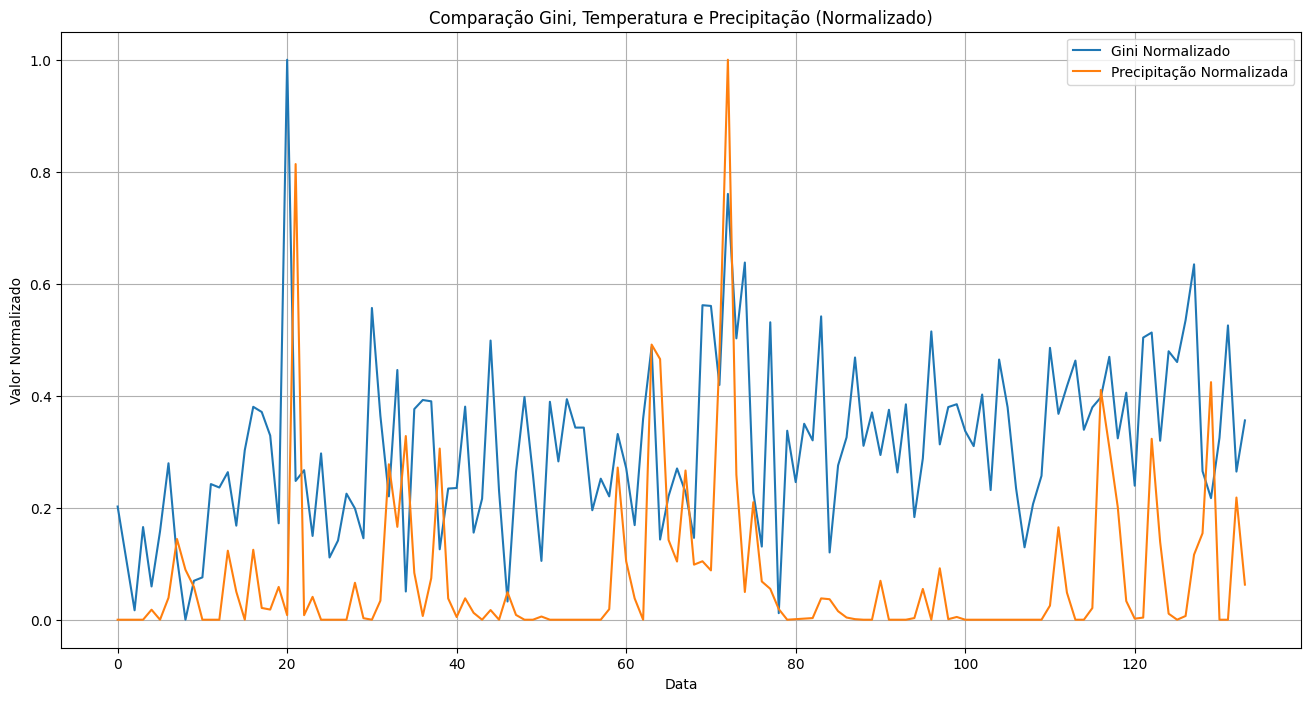

In [30]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Supondo df_gini e df_meteo_semanal já com índices datetime

# Primeiro, alinhamos os índices (datas) comuns para comparação
common_dates = df_gini.index.intersection(df_meteo_semanal.index)

gini_aligned = df_gini.loc[common_dates]['gini'].values.reshape(-1, 1)
#temp_aligned = df_meteo_semanal.loc[common_dates]['temp'].values.reshape(-1, 1)
precip_aligned = df_meteo_semanal.loc[common_dates]['precip'].values.reshape(-1, 1)

# Normalização com MinMaxScaler
scaler = MinMaxScaler()

gini_scaled = scaler.fit_transform(gini_aligned).flatten()
#temp_scaled = scaler.fit_transform(temp_aligned).flatten()
precip_scaled = scaler.fit_transform(precip_aligned).flatten()

# Gráfico
plt.figure(figsize=(16, 8))
plt.plot(common_dates, gini_scaled, label='Gini Normalizado')
#plt.plot(common_dates, temp_scaled, label='Temperatura Normalizada')
plt.plot(common_dates, precip_scaled, label='Precipitação Normalizada')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.title('Comparação Gini, Temperatura e Precipitação (Normalizado)')
plt.legend()
plt.grid(True)
plt.show()
